**Classification Practical** 

- We are practising carrying out classification using _KNearestNeighbors_ model in scikit learn 

In [1]:
#importing packages
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# valid=np.where(~cond)[0]#not condZ(~)

In [3]:
path="c:\\Users\\ADMIN\\Downloads"
import os
data=os.path.join(path,'spambase.data')
doc=os.path.join(path,'spambase.DOCUMENTATION')
columns=os.path.join(path,'spambase.names')


In [4]:
column_names=[]
with open(columns,'r') as columns:
 for line in columns:
    if line.startswith("|"):
        continue
    else:
        column_name=line.split(":")[0].strip()#strip re,oves any white space
        column_names.append(column_name)



In [5]:
#As notable from the otput we have 61 attributes instead of having 58 attributes where 3 are just an empty string now lets fix that
print(len(column_names))
for i in range(3):
    column_names.remove('')
print(len(column_names)) #With that we have deleted the first3 invalid columns in the column_names list   
print(column_names[:5])

61
58
['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our']


In [6]:
df=pd.read_csv(data,header=None,names=column_names)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam or non_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [7]:
#DROP DUPLICATES
df=df.drop_duplicates().reset_index(drop=True)

**Columns study**
- Some columns have some suspicious names lets look at them


In [8]:
char=[]
for i in df.columns:
    if i.startswith("char_freq"):
      char.append(i)
print(char)
df[['char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#']]

#from output now the dataset is actually okay!!



['char_freq_;', 'char_freq_(', 'char_freq_[', 'char_freq_!', 'char_freq_$', 'char_freq_#']


,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#
0,0.000,0.000,0.0,0.778,0.000,0.000
1,0.000,0.132,0.0,0.372,0.180,0.048
2,0.010,0.143,0.0,0.276,0.184,0.010
3,0.000,0.137,0.0,0.137,0.000,0.000
4,0.000,0.135,0.0,0.135,0.000,0.000
...,...,...,...,...,...,...
4205,0.000,0.232,0.0,0.000,0.000,0.000
4206,0.000,0.000,0.0,0.353,0.000,0.000
4207,0.102,0.718,0.0,0.000,0.000,0.000
4208,0.000,0.057,0.0,0.000,0.000,0.000


In [9]:
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam or non_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4206,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4207,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4208,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [10]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam or non_spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [11]:
df.drop_duplicates().reset_index(drop=True)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam or non_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4206,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4207,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4208,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [12]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam or non_spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [13]:
df.info()
#everything seems okay now lets do the modelling part we are going to use KNeighborsClassifier

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4210 entries, 0 to 4209
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4210 non-null   float64
 1   word_freq_address           4210 non-null   float64
 2   word_freq_all               4210 non-null   float64
 3   word_freq_3d                4210 non-null   float64
 4   word_freq_our               4210 non-null   float64
 5   word_freq_over              4210 non-null   float64
 6   word_freq_remove            4210 non-null   float64
 7   word_freq_internet          4210 non-null   float64
 8   word_freq_order             4210 non-null   float64
 9   word_freq_mail              4210 non-null   float64
 10  word_freq_receive           4210 non-null   float64
 11  word_freq_will              4210 non-null   float64
 12  word_freq_people            4210 non-null   float64
 13  word_freq_report            4210 

**MODELLING USING KNEIGHBORSCLASSIFIERS**

- We need to split our data first into a traing,validation and test set ~~
- Ensure there  is relative scaling ~~
- oversample the trainig data ~~
- Check for the accuracy,precision and f1-Score ~~
- Plot our accuracies using various number of neighbors and discover any form of overfitting or underfitting
- Check correlation
- DeFine an error/loss funtion(Am not sure about that!)
- Define the distance function(Euclidean distance)
- Get a classification_report ~~



**Scaling the data**
- partial_fit()
- Online computation of mean and std on X for later scaling.

All of X is processed as a single batch. This is intended for cases
when fit is not feasible due to very large number of n_samples or because X is read from a continuous stream.

The algorithm for incremental mean and std is given in Equation 1.5a,b in Chan, Tony F., Gene H. Golub, and Randall J. LeVeque. "Algorithms
for computing the sample variance: Analysis and recommendations." The American Statistician 37.3 (1983): 242-247:

In [14]:
#Sklearn deals with arrays of the eature matrix and and array of labe/target column
x=df.drop(columns=['spam or non_spam'],axis=1).values
y=df[df.columns[-1]].values
print(x.shape,y.shape)
print(type(x),type(y))

(4210, 57) (4210,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [15]:
from sklearn.preprocessing import StandardScaler

def scale_df(df):
  ss=StandardScaler()
  x_new=ss.fit_transform(x)
  new_df=np.hstack((x_new,y.reshape(-1,1)))
  return new_df,x_new,y

- fit_transform()
-  Parameters
- X : array-like of shape (n_samples, n_features)
    Input samples.

- y : array-like of shape (n_samples,) or (n_samples, n_outputs), default=None
    Target values (None for unsupervised transformations).

- **fit_params : dict
   Additional fit parameters.


In [16]:
new_df,x,y=scale_df(df)
new_df
new_df=pd.DataFrame(new_df,columns=column_names)
new_df


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam or non_spam
0,-0.347922,1.161025,0.675889,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.160010,-0.525294,-0.164364,0.589246,-0.317325,-0.105071,-0.049117,0.044398,-0.021310,1.0
1,0.352150,0.368433,0.404391,-0.046644,-0.269470,0.664297,0.232922,-0.092630,-0.325617,1.053337,...,-0.160010,-0.043936,-0.164364,0.107759,0.433676,0.005053,-0.008143,0.244841,1.191142,1.0
2,-0.147901,-0.248027,0.811639,-0.046644,1.315470,0.338207,0.182574,0.029252,1.943000,0.002406,...,-0.120407,-0.003822,-0.164364,-0.006090,0.450365,-0.082129,0.133876,2.169089,3.181179,1.0
3,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.160010,-0.025702,-0.164364,-0.170935,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954,1.0
4,-0.347922,-0.248027,-0.565245,-0.046644,0.443026,-0.350205,0.484661,1.272445,0.773244,0.581180,...,-0.160010,-0.032996,-0.164364,-0.173306,-0.317325,-0.105071,-0.055724,-0.060834,-0.161954,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4205,0.685518,-0.248027,0.637104,-0.046644,-0.473040,0.772994,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.160010,0.320730,-0.164364,-0.333407,-0.317325,-0.105071,-0.127986,-0.246243,-0.328464,0.0
4206,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.160010,-0.525294,-0.164364,0.085226,-0.317325,-0.105071,-0.115525,-0.241232,-0.448093,0.0
4207,0.652181,-0.248027,0.016537,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,0.243945,2.093004,-0.164364,-0.333407,-0.317325,-0.105071,-0.120081,-0.231210,-0.279966,0.0
4208,2.852406,-0.248027,-0.565245,-0.046644,-0.007737,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.160010,-0.317435,-0.164364,-0.333407,-0.317325,-0.105071,-0.127835,-0.236221,-0.344630,0.0


In [17]:
new_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam or non_spam
count,4.210000e+03,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4.210000e+03,4210.000000,4.210000e+03,4210.000000,4.210000e+03,...,4210.000000,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4.210000e+03,4210.000000
mean,4.725700e-17,1.350200e-17,2.700400e-17,0.000000,4.050600e-17,-1.350200e-17,0.000000,-1.350200e-17,0.000000,-8.776300e-17,...,0.000000,-6.751000e-18,1.350200e-17,-2.700400e-17,-2.700400e-17,2.700400e-17,-1.350200e-17,-1.350200e-17,-2.700400e-17,0.398812
std,1.000119e+00,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119e+00,1.000119,1.000119e+00,1.000119,1.000119e+00,...,1.000119,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,1.000119e+00,0.489712
min,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.322705e-01,-2.562653e-01,-4.691088e-01,0.000000
25%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-0.160010,-5.252942e-01,-1.643641e-01,-3.334068e-01,-3.173253e-01,-1.050711e-01,-1.133376e-01,-2.261989e-01,-4.060613e-01,0.000000
50%,-3.479216e-01,-2.480275e-01,-5.652450e-01,-0.046644,-4.730399e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-3.783664e-01,...,-0.160010,-2.590883e-01,-1.643641e-01,-3.144319e-01,-3.173253e-01,-1.050711e-01,-9.313751e-02,-1.861104e-01,-3.066403e-01,0.000000
75%,-3.479216e-01,-2.480275e-01,2.880349e-01,-0.046644,1.231299e-01,-3.502046e-01,-0.295731,-2.632646e-01,-0.325617,-8.897950e-02,...,-0.160010,1.821569e-01,-1.643641e-01,5.913558e-02,-9.619715e-02,-1.050711e-01,-5.060267e-02,-4.078958e-02,-2.818053e-02,1.000000
max,1.478696e+01,3.119145e+01,9.325045e+00,31.609920,1.406769e+01,2.095434e+01,18.005710,2.681886e+01,18.319574,2.731139e+01,...,17.206130,3.503689e+01,3.843832e+01,3.818318e+01,2.472857e+01,4.538756e+01,3.310208e+01,4.979423e+01,2.513787e+01,1.000000


**Split the data**
- #pandas sample() is used to generate a sample random row or column from the function caller data frame.
#parameters of the above:
       # n:int value,number of rows to generate
       #frac:Float value,returns(float value*length of dataframe values) its is a float value rep the fraction of random axis items(rows or columns)to return         
#sample() in python is used to create a random sample without replacement of a specified length meaning that different objects will be selected from a sequence,but once an object has been selected it wont't again
#it is found in the random module
#converts this to a numpy array


In [18]:
train,valid,test=np.split(new_df.sample(frac=1),[int(0.6*len(new_df)),int(0.8*len(new_df))])

C:\Users\ADMIN\AppData\Roaming\Python\Python312\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [19]:
train

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam or non_spam
4146,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.16001,-0.525294,-0.164364,-0.333407,-0.317325,-0.105071,-0.120956,-0.241232,-0.452943,0.0
4101,0.818865,-0.248027,0.811639,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,0.154715,...,-0.16001,-0.280968,-0.164364,-0.333407,-0.317325,-0.105071,-0.132270,-0.256265,-0.406061,0.0
1207,0.385487,-0.248027,-0.565245,-0.046644,-0.473040,0.446904,0.258095,-0.263265,-0.325617,-0.043287,...,-0.16001,15.049570,-0.164364,0.433889,-0.317325,-0.105071,-0.106051,-0.156044,-0.123156,1.0
432,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,2.970966,-0.378366,...,-0.16001,-0.036642,-0.164364,0.302251,-0.317325,-0.105071,-0.097090,-0.146022,-0.365646,1.0
1965,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,0.444102,...,-0.16001,1.513186,-0.164364,-0.333407,-0.317325,-0.105071,-0.070750,-0.196133,-0.220152,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,-0.347922,-0.248027,-0.565245,-0.046644,0.006804,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.16001,-0.051229,0.242378,-0.333407,-0.317325,-0.105071,-0.101616,-0.166066,-0.268650,0.0
2416,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,1.007644,...,-0.16001,1.152167,-0.164364,-0.333407,-0.317325,-0.105071,-0.104573,-0.196133,-0.355947,0.0
1909,3.619152,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,1.434109,...,-0.16001,0.933368,-0.164364,-0.333407,-0.317325,-0.105071,-0.069211,-0.206155,-0.360796,0.0
3624,-0.347922,-0.248027,-0.565245,-0.046644,-0.473040,-0.350205,-0.295731,-0.263265,-0.325617,-0.378366,...,-0.16001,-0.525294,-0.164364,-0.333407,-0.317325,-0.105071,-0.102099,-0.236221,-0.457793,0.0


In [20]:
print(train['spam or non_spam'].describe())
print(train['spam or non_spam'].value_counts())

count    2526.000000
mean        0.399446
std         0.489881
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: spam or non_spam, dtype: float64
spam or non_spam
0.0    1517
1.0    1009
Name: count, dtype: int64


**Oversampling the training data**

**Resapmle()**
- Parameters
- X : {array-like, dataframe, sparse matrix} of shape (n_samples, n_features)
    Matrix containing the data which have to be sampled.

- y : array-like of shape (n_samples,)
    Corresponding label for each sample in X.

- Returns
- X_resampled : {array-like, dataframe, sparse matrix} of shape (n_samples_new, n_features)
    The array containing the resampled data.

- y_resampled : array-like of shape (n_samples_new,)
    The corresponding label of X_resampled.



In [21]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_train=train.drop(columns=['spam or non_spam'],axis=1).values
y_train=train['spam or non_spam'].values
xr,yr=smote.fit_resample(x_train,y_train)
train=np.hstack((xr,yr.reshape(-1,1)))
train=pd.DataFrame(train,columns=column_names)

In [22]:
train['spam or non_spam'].value_counts()

spam or non_spam
0.0    1517
1.0    1517
Name: count, dtype: int64

_KNN MODELLING_

In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
x=train.drop(columns=['spam or non_spam'],axis=1).values
y=train['spam or non_spam'].values
knn.fit(x,y)

KNeighborsClassifier(n_neighbors=4)

In [24]:
#Working with prediction on the test data
X_test=test.drop(columns=['spam or non_spam'],axis=1).values
y_test=test['spam or non_spam'].values
predictions=knn.predict(X_test)

print(knn.score(X_test,y_test))#Our accuracy is at 88 % When we have 3 neighbors on test data
print(knn.score(x_train,y_train))#Our accuracy on training data is 95% when we have 3 neighors

0.8907363420427553
0.9477434679334917


In [25]:
#Lets get a classification_report
from sklearn.metrics import classification_report
#clk=class_likelihood_ratios()
print(classification_report(y_test,predictions))#classification report on test data

              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91       501
         1.0       0.89      0.83      0.86       341

    accuracy                           0.89       842
   macro avg       0.89      0.88      0.89       842
weighted avg       0.89      0.89      0.89       842



In [26]:
#classification report on training data
trainpreds=knn.predict(x_train)
print(classification_report(y_train,trainpreds))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96      1517
         1.0       0.95      0.92      0.93      1009

    accuracy                           0.95      2526
   macro avg       0.95      0.94      0.95      2526
weighted avg       0.95      0.95      0.95      2526



_Model complexity curve_
- for the training and test dataframes

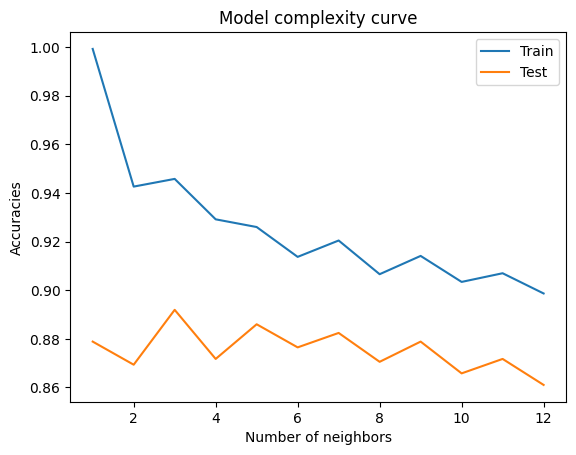

In [27]:
accuracies_training={}
accuracies_testing={}
for i in np.arange(1,13,1):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    scoretrain=knn.score(x_train,y_train)
    accuracies_training[i]=scoretrain
    scoretest=knn.score(X_test,y_test)
    accuracies_testing[i]=scoretest
#plt.figure(figsize=(3,3))    
plt.plot(np.arange(1,13,1),accuracies_training.values(),label="Train")    
plt.plot(np.arange(1,13,1),accuracies_testing.values(),label="Test")
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracies")
plt.title("Model complexity curve")
plt.legend()
plt.show()

In [28]:
#From the curve above maybe 7/9 could be the best
#Let's look at 6-10
for i in np.arange(6,11,1):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)

_Logistic Regression_

In [29]:
new_df
x=new_df.drop(columns='spam or non_spam',axis=1).values
y=new_df['spam or non_spam'].values

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
lr=LogisticRegression(random_state=42)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)


In [31]:
print(type(x))

<class 'numpy.ndarray'>


In [32]:
print(f"df: {len(new_df)}")
print(f"Train:{len(x_train)}")
print(f"Test: {len(x_test)}")

df: 4210
Train:2947
Test: 1263


In [33]:
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)
predictions
print(lr.score(x_train,y_train))
print(lr.score(x_test,y_test))
print(classification_report(y_test,predictions))


0.9290804207668816
0.9231987331749802
              precision    recall  f1-score   support

         0.0       0.92      0.95      0.94       759
         1.0       0.92      0.88      0.90       504

    accuracy                           0.92      1263
   macro avg       0.92      0.92      0.92      1263
weighted avg       0.92      0.92      0.92      1263



In [34]:
from sklearn.metrics import accuracy_score,mean_squared_error,confusion_matrix
print(f"Accuracy score:{accuracy_score(y_test,predictions)}")
print(f"MSE:{mean_squared_error(y_test,predictions)}")

Accuracy score:0.9231987331749802
MSE:0.0768012668250198


In [35]:
#Accuracy score plus mean_squared_error=1
0.9283128167994207+0.07168718320057929

1.0

[[723  36]
 [ 61 443]]


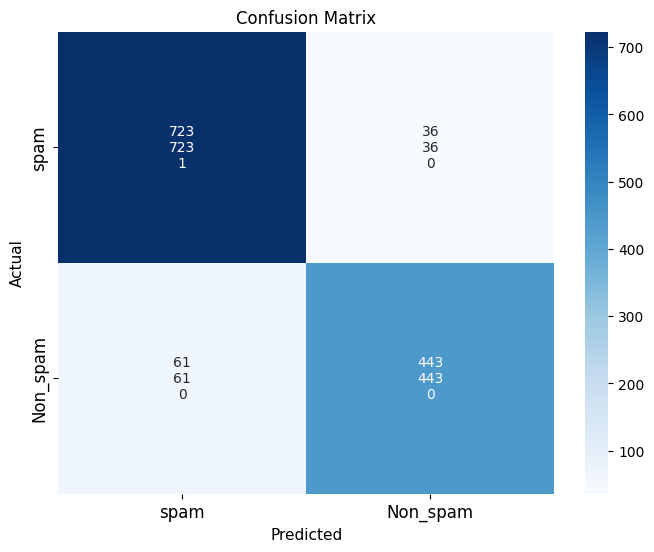

In [36]:
cm=confusion_matrix(y_test,predictions)
names=['True Positive','True Negative','False Positive','False Negative']
counts=['{0:0.0f}'.format(value) for value in cm.flatten()]
percentages=['{0:0.0f}'.format(value) for value in cm.flatten()/np.sum(cm)]
labels=[f'{v2}\n{v2}\n{v3}' for v1,v2,v3 in zip(names,counts,percentages)]
labels=np.asarray(labels).reshape(2,2)
ticklabels=['spam','Non_spam']
print(cm)

plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=labels,fmt='',cmap='Blues',xticklabels=ticklabels,yticklabels=ticklabels)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Confusion Matrix")
plt.xlabel("Predicted",size=11)
plt.ylabel("Actual",size=11)
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV
